# Bimodal Gaussian Posterior - NPE_C method

In [1]:
import os
import sys
import timeit

# Add the parent directory (lfi) to sys.path
sys.path.insert(0, os.path.abspath('..'))
import sbi
import sbi.utils
import sbi.inference
import sbi.diagnostics
import sbi.analysis
import lfi
import torch
import numpy as np
import lfi.utils

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
2024-12-12 10:51:10.873 | INFO     | lfi.config:<module>:11 - PROJ_ROOT path is: /home/givasile/github/projects/sbi


In [2]:
np.random.seed(21355)
torch.manual_seed(21)

## D=2

In [3]:
D = 2
subset_dims = [i for i in range(D)]
limits = [-10, 10]

In [4]:
sim = lfi.simulators.BimodalGaussian(sigma_noise=0.1)
prior = lfi.priors.UniformPrior(low=-10, high=10, dim=D)
observation = np.zeros(D)
prior_sbi = prior.return_sbi_object()

In [5]:
# density_estimator_fun = sbi.neural_nets.posterior_nn(
#     model='nsf',
#     hidden_features=100,# 20, # 50,
#     num_transforms=8,# 2, # 5,
#     z_score_x="independent",
#     z_score_theta="independent",
# )

In [6]:
npe_c_single_round = lfi.utils.SingleRoundFMPE(
    prior=prior_sbi, 
    simulator=sim.sample_pytorch,
    observation=observation, 
    density_estimator=None
)

### Budget 1_000

In [14]:
tic = timeit.default_timer()
npe_c_single_round.train(simulation_budget=1_000)
toc = timeit.default_timer()
print(f"\nTraining time: {toc - tic:.2f} seconds")

  0%|          | 0/1000 [00:00<?, ?it/s]

 Neural network successfully converged after 120 epochs.
Training time: 1.69 seconds


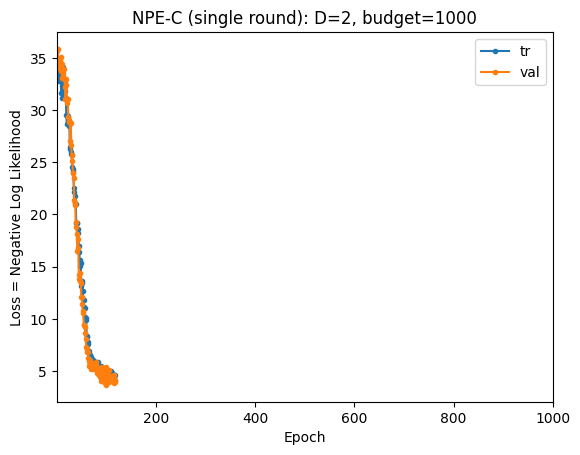

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'NPE-C (single round): D=2, budget=1000'}, xlabel='Epoch', ylabel='Loss = Negative Log Likelihood'>)

In [15]:
npe_c_single_round.plot_training_summary(budget=1_000)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

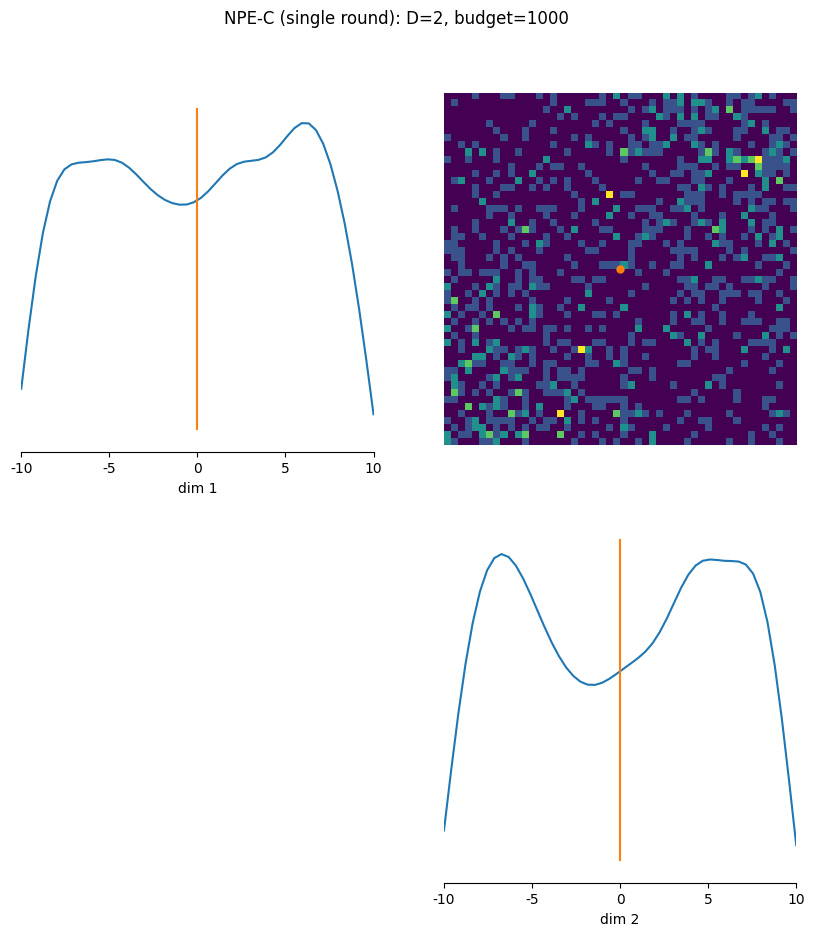

(<Figure size 1000x1000 with 4 Axes>,
 array([[<Axes: xlabel='dim 1'>, <Axes: >],
        [<Axes: xlabel='dim 1'>, <Axes: xlabel='dim 2'>]], dtype=object))

In [16]:
npe_c_single_round.plot_posterior_samples(subset_dims=subset_dims, limits=limits, budget=1_000)

### Budget 3_000

In [21]:
tic = timeit.default_timer()
npe_c_single_round.train(simulation_budget=10_000)
toc = timeit.default_timer()
print(f"\nTraining time: {toc - tic:.2f} seconds")

  0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 65 epochs.
Training time: 11.87 seconds


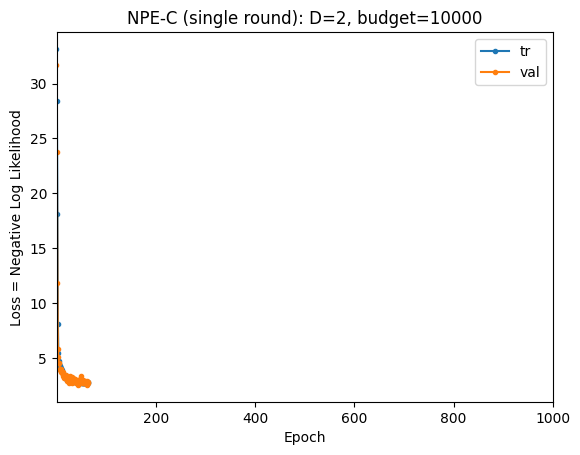

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'NPE-C (single round): D=2, budget=10000'}, xlabel='Epoch', ylabel='Loss = Negative Log Likelihood'>)

In [22]:
npe_c_single_round.plot_training_summary(budget=10_000)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

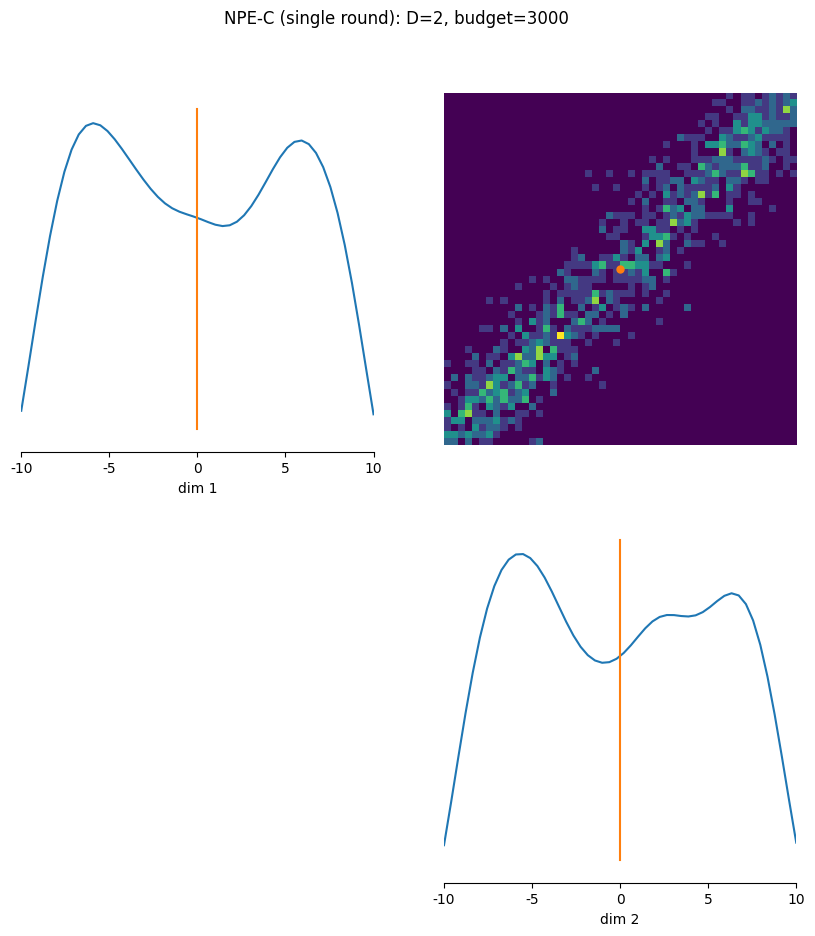

(<Figure size 1000x1000 with 4 Axes>,
 array([[<Axes: xlabel='dim 1'>, <Axes: >],
        [<Axes: xlabel='dim 1'>, <Axes: xlabel='dim 2'>]], dtype=object))

In [23]:
npe_c_single_round.plot_posterior_samples(subset_dims=subset_dims, limits=limits, budget=3_000)

## D=5

In [22]:
D = 5
subset_dims = [i for i in range(D)]
limits = [-10, 10]

In [23]:
sim = lfi.simulators.BimodalGaussian(sigma_noise=0.1)
prior = lfi.priors.UniformPrior(low=-10, high=10, dim=D)
observation = np.zeros(D)
prior_sbi = prior.return_sbi_object()

In [24]:
density_estimator_fun = sbi.neural_nets.posterior_nn(
    model='nsf',
    hidden_features=100,# 20, # 50,
    num_transforms=8,# 2, # 5,
    z_score_x="independent",
    z_score_theta="independent",
)

In [25]:
npe_c_single_round = lfi.utils.SingleRoundNPEC(
    prior=prior_sbi, 
    simulator=sim.sample_pytorch,
    observation=observation, 
    density_estimator=density_estimator_fun
)

### Budget 1_000

In [26]:
tic = timeit.default_timer()
npe_c_single_round.train(simulation_budget=1_000)
toc = timeit.default_timer()
print(f"\nTraining time: {toc - tic:.2f} seconds")

  0%|          | 0/1000 [00:00<?, ?it/s]

 Neural network successfully converged after 319 epochs.
Training time: 28.44 seconds


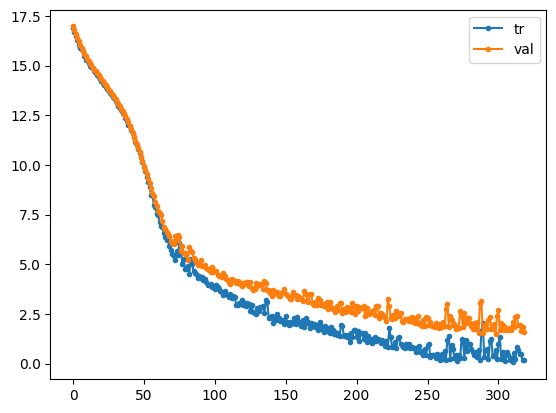

(<Figure size 640x480 with 1 Axes>, <Axes: >)

In [27]:
npe_c_single_round.plot_training_summary()

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

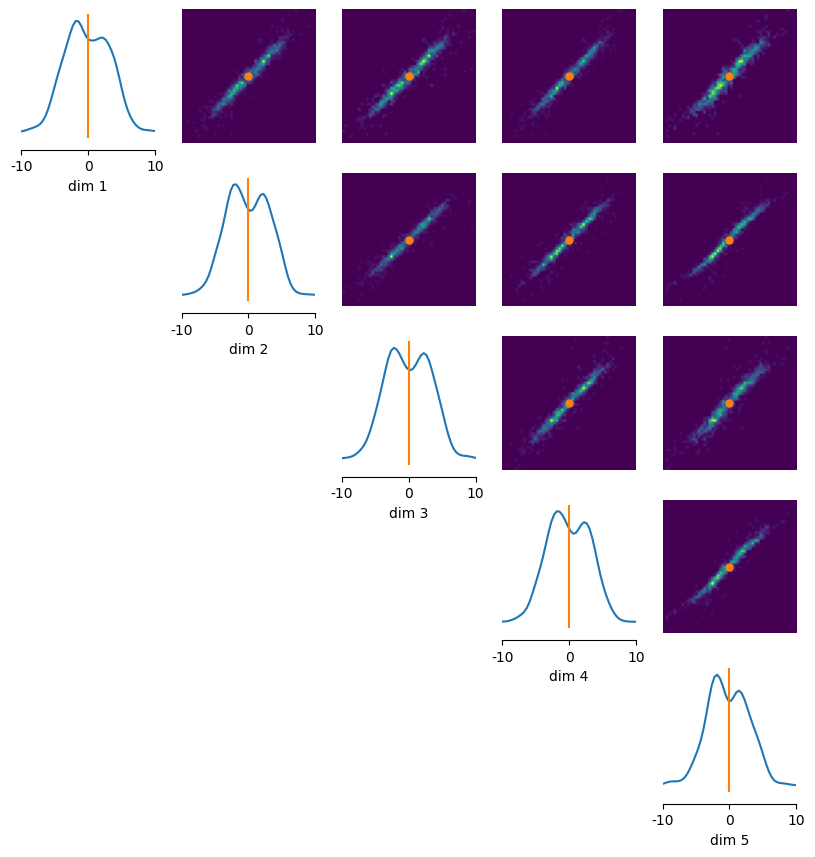

In [28]:
npe_c_single_round.plot_posterior_samples(subset_dims=subset_dims, limits=limits)

### Budget 5_000

In [35]:
tic = timeit.default_timer()
npe_c_single_round.train(simulation_budget=5_000)
toc = timeit.default_timer()
print(f"\nTraining time: {toc - tic:.2f} seconds")

  0%|          | 0/5000 [00:00<?, ?it/s]

 Neural network successfully converged after 228 epochs.
Training time: 148.84 seconds


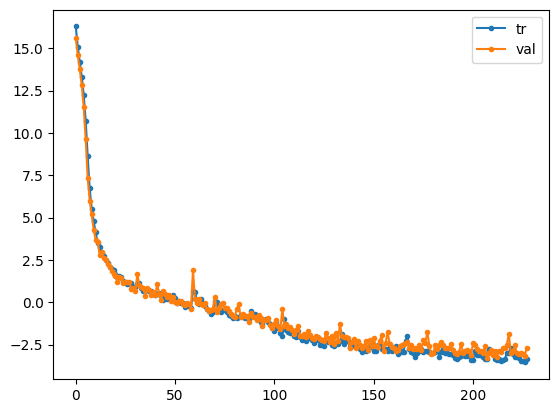

(<Figure size 640x480 with 1 Axes>, <Axes: >)

In [36]:
npe_c_single_round.plot_training_summary()

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

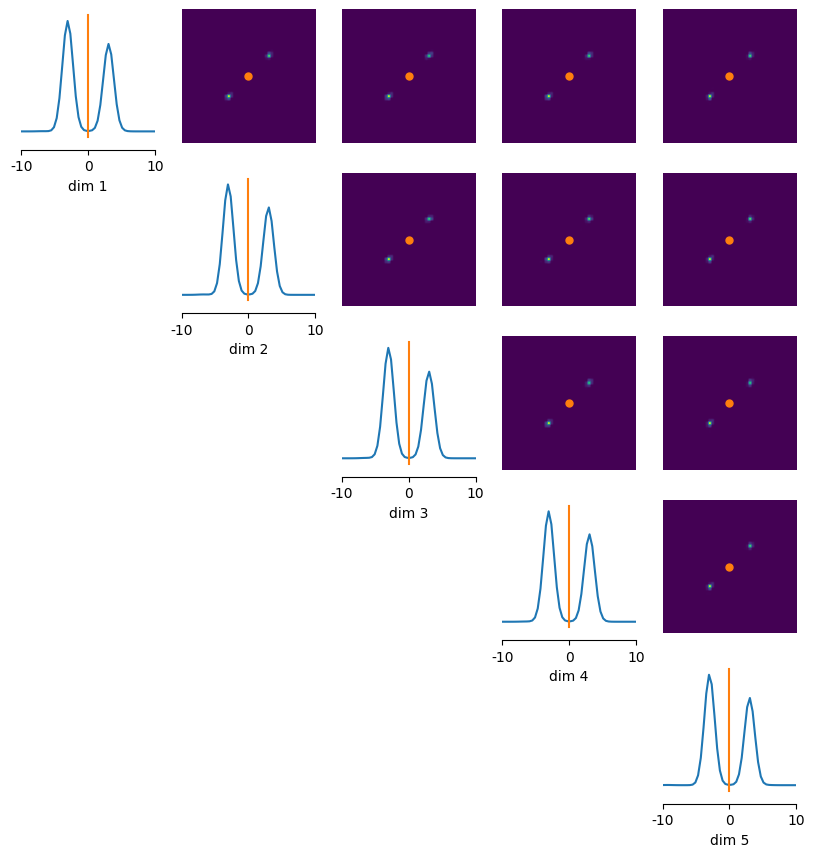

In [37]:
npe_c_single_round.plot_posterior_samples(subset_dims=subset_dims, limits=limits)

## D= 10

In [54]:
D = 10
subset_dims = [i for i in range(D)]
limits = [-10, 10]

In [55]:
sim = lfi.simulators.BimodalGaussian(sigma_noise=0.1)
prior = lfi.priors.UniformPrior(low=-10, high=10, dim=D)
observation = np.zeros(D)
prior_sbi = prior.return_sbi_object()

In [56]:
density_estimator_fun = sbi.neural_nets.posterior_nn(
    model='nsf',
    hidden_features=100,# 20, # 50,
    num_transforms=8,# 2, # 5,
    z_score_x="independent",
    z_score_theta="independent",
)

In [57]:
npe_c_single_round = lfi.utils.SingleRoundNPEC(
    prior=prior_sbi, 
    simulator=sim.sample_pytorch,
    observation=observation, 
    density_estimator=density_estimator_fun
)

### Budget 5_000

In [58]:
tic = timeit.default_timer()
npe_c_single_round.train(simulation_budget=5_000)
toc = timeit.default_timer()
print(f"\nTraining time: {toc - tic:.2f} seconds")

  0%|          | 0/5000 [00:00<?, ?it/s]

 Neural network successfully converged after 133 epochs.
Training time: 102.68 seconds


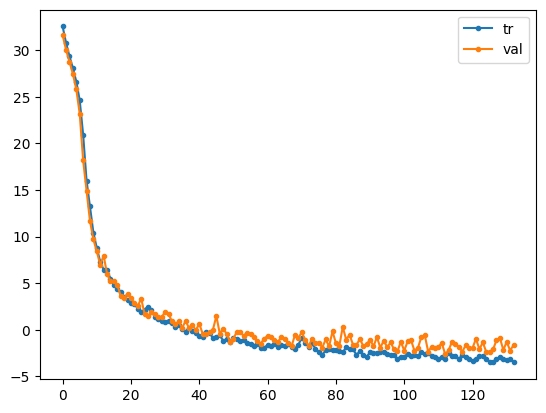

(<Figure size 640x480 with 1 Axes>, <Axes: >)

In [59]:
npe_c_single_round.plot_training_summary()

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

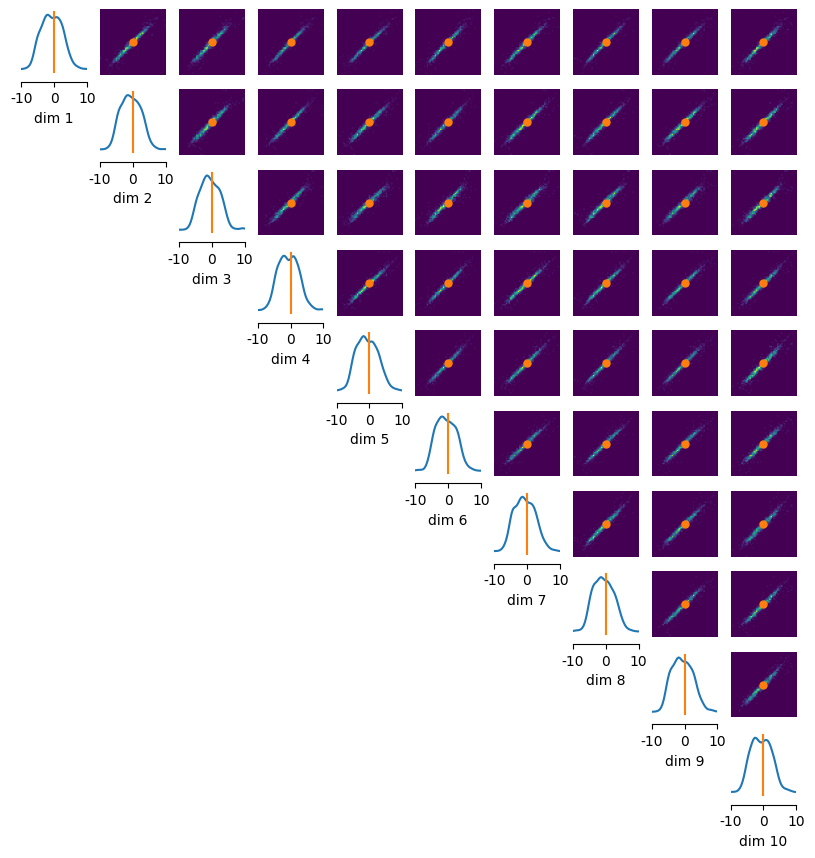

In [60]:
npe_c_single_round.plot_posterior_samples(subset_dims=subset_dims, limits=limits)

### Budget 10_000

In [65]:
tic = timeit.default_timer()
npe_c_single_round.train(simulation_budget=10_000)
toc = timeit.default_timer()
print(f"\nTraining time: {toc - tic:.2f} seconds")

  0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 103 epochs.
Training time: 186.58 seconds


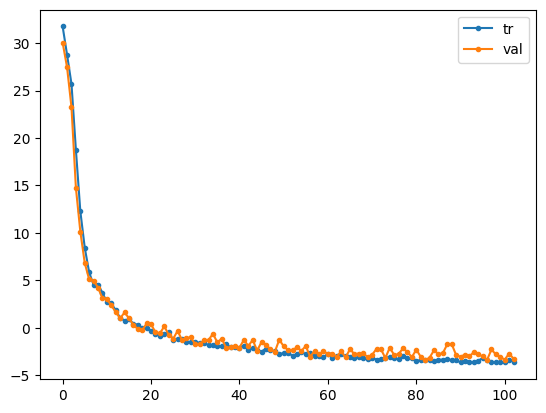

(<Figure size 640x480 with 1 Axes>, <Axes: >)

In [66]:
npe_c_single_round.plot_training_summary()

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

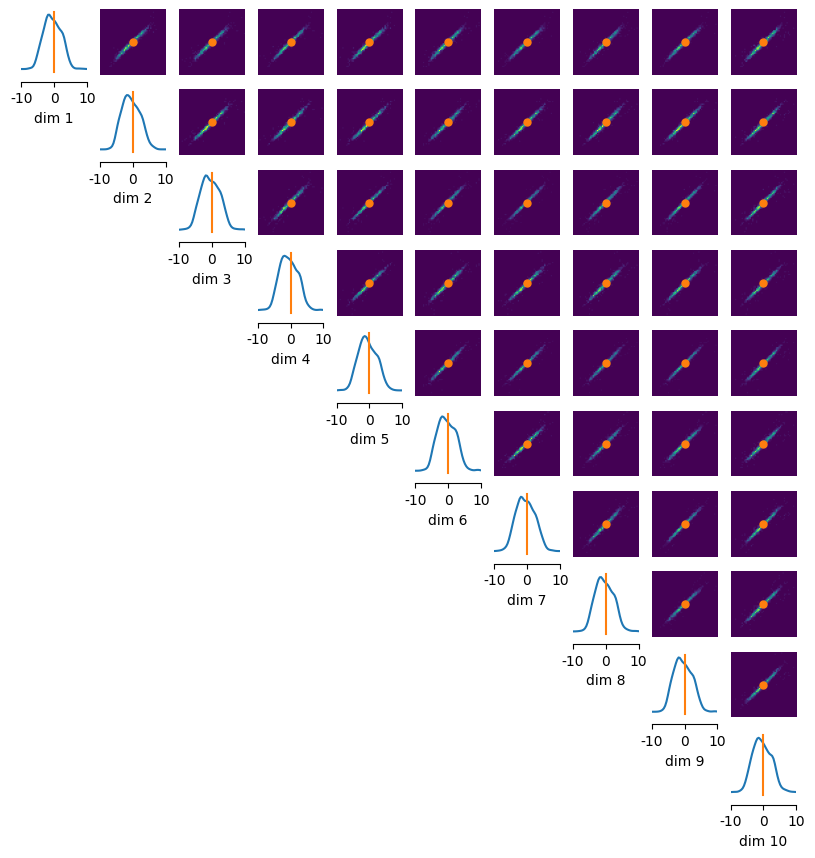

In [67]:
npe_c_single_round.plot_posterior_samples(subset_dims=subset_dims, limits=limits)

### Budget 20_000

In [68]:
tic = timeit.default_timer()
npe_c_single_round.train(simulation_budget=20_000)
toc = timeit.default_timer()
print(f"\nTraining time: {toc - tic:.2f} seconds")

  0%|          | 0/20000 [00:00<?, ?it/s]

 Neural network successfully converged after 166 epochs.
Training time: 732.24 seconds


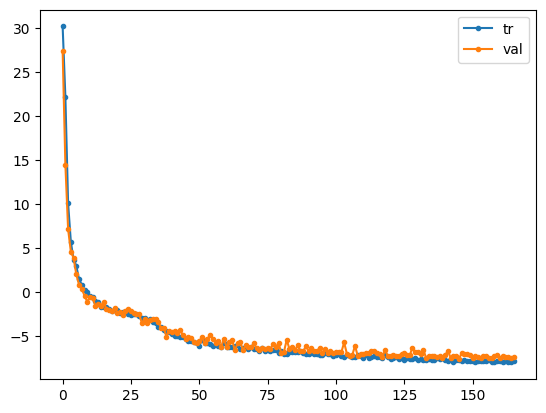

(<Figure size 640x480 with 1 Axes>, <Axes: >)

In [69]:
npe_c_single_round.plot_training_summary()

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

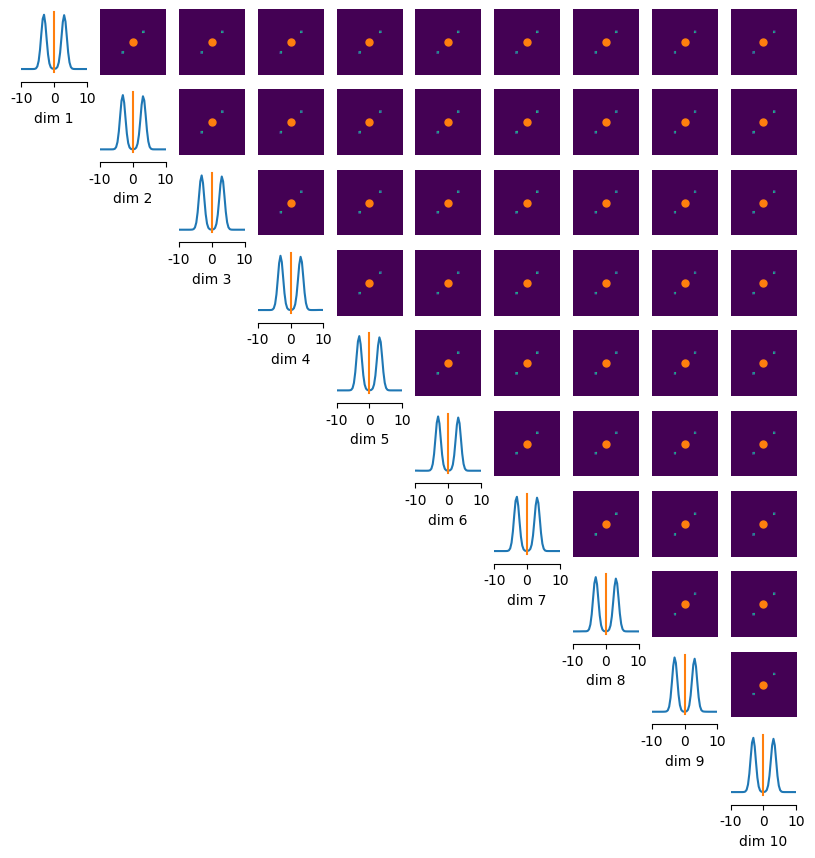

In [70]:
npe_c_single_round.plot_posterior_samples(subset_dims=subset_dims, limits=limits)